<a href="https://colab.research.google.com/github/gagan12334/Data-Analytics-For-Beats-by-Dre/blob/main/Gagan_Data_Analytics_for_BEATS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consumer Insights Data Analytics for Beats By Dre headphones

## 1. Title Page
**Project Title:** Consumer Insights Data Analytics Externship of Beats by Dre  
**Student Name:** Gagan Chandra Charagondla  
**Date:** 7/24/2024

## 2. Table of Contents
1. Introduction
2. Data Description
3. Exploratory Data Analysis (EDA)
4. Sentiment Analysis
5. AI-Generated Insights
6. Comparative Analysis
7. Strategic Recommendations
8. Conclusion
9. References

## 3. Introduction

### 3.1 Project Overview
In this project, I used data analytics to gain consumer insights for Beats headphones. By web scraping data from five different companies, including Beats, and employing EDA, sentiment analysis, and the Gemini AI API, I developed strategic recommendations to enhance Beats' competitiveness in the market.


In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from textblob import TextBlob
from scipy.stats
import os
import google.generativeai as genai

from google.colab import drive
drive.mount('/content/drive')

### 3.2 Background
Beats by Dre, a renowned brand in the audio industry, is known for its high-quality headphones and audio products. In the competitive tech industry, understanding consumer sentiment is crucial as it provides valuable insights into customer preferences, satisfaction, and areas for improvement. Analyzing consumer sentiment helps companies like Beats by Dre tailor their products and marketing strategies to better meet customer needs, ultimately enhancing brand loyalty and market position.

## 4. Data Description

### 4.1 Data Sources
To gather the data I employed oxylabs, a web scraping tool to get data from amazon. I gathered reviews in JSON format from 5 companies: Betas, Sennheiser, JBL, Sony, and Bose. Each companies has 2 data frames each with around 100 reviews as Amazon only allows this many to be scraped at once.


In [ ]:
#I used an example file for this script
file_path = '/content/drive/MyDrive/RawDataBeats/raw_Bose2.json'
with open(file_path, 'r') as file:
    data = json.load(file)

### 4.2 Data Collection
Once recieving JSON objects of the reviews I used this script inorder to convert each of the 10 JSON objects into a data frame that is easier to use and manipulate.

In [ ]:
reviews_data = []
count = 0
for result in data['results']:
  asin = result['content']["asin"]
  for review in result['content']['reviews']:
    count += 1
    try:
      review_info = {
      'review_id': review['id'],
      'product_id': asin,
      "title": review["title"],
      "author": review["author"],
      "rating": review["rating"],
      "content": review["content"],
      "timestamp": review["timestamp"],
      "profile_id": review["profile_id"],
      "is_verified": review["is_verified"],
      "helpful_count": review.get('helpful_count', 0),
      "product_attributes": review["product_attributes"]
      }
      reviews_data.append(review_info)
    except:
      print(count)
      break

reviews_df = pd.DataFrame(reviews_data)
reviews_df.to_csv('1Bose2.csv', index=False)

### 4.3 Data Cleaning
I first displayed the data for each data frame to understand more about the data. Then I proceeded to clean the data by dropping duplicates, replacing any null values with the mean of its column, and converting data types.

I chose to fill the missing values with the mean as it provides a better understanding of what the value could have been. Replacing it with a null number like 0 would have caused more skewness based on my research.

I also decided to handle outliers using the z-score function from the scipy.stats library. I removed any data that were more than 3 standard deviations away from the corresponding column's mean value. I believe that z-scores are a great way of finding outliers in data.

In [ ]:
#display some info to learn more about the data set
print("First few rows of the dataset:")
print(df.head())

print("\nSummary statistics of the dataset:")
print(df.describe())

print("\nInformation about the dataset:")
print(df.info())

print("\nNumber of missing values:")
print(df.isnull().sum())

In [ ]:
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

#drop duplicates
df = df.drop_duplicates(subset='review_id')

# Convert data types
df["rating"] = df["rating"].astype(int)
df["helpful_count"] = df["helpful_count"].astype(int)
df["is_verified"] = df["is_verified"].astype(bool)

#df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

print("\nNumber of missing values after handling:")
print(df.isnull().sum())

In [ ]:
#Handling outliers
from scipy.stats import zscore
z_scores = np.abs(zscore(df[num_cols]))
df = df[(z_scores < 3).all(axis=1)]

print("\nSummary statistics after removing outliers:")
print(df.describe())

## 5. Exploratory Data Analysis (EDA)

### 5.1 Data Overview
Summary of the dataset, including key statistics:

Rating mean: 4.42798353909465

Rating median: 5.0

Rating mode: 0    5

Rating std: 0.8256688127816336

Rating var: 0.6817289884002323

Helpful Count mean: 6.689300411522634

Helpful Count median: 0.0

Helpful Count mode: 0 0

Helpful Count std: 36.83377878038455

Helpful Count var: 1356.727259242307

Summary:

Beats headphones have a high average rating of 4.72, with slightly negative skewness, indicating that most reviews are highly positive. Bose shows an even higher average rating of 4.86, suggesting it may be rated slightly better overall. The variation in helpful counts, with many reviews not marked as particularly helpful, highlights inconsistencies in perceived review usefulness. The negative skewness in ratings for Beats indicates a predominance of high ratings, suggesting overall satisfaction with some variance. Further sentiment analysis could provide deeper insights into these patterns.

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/CleanedData/cleaned_BeatsData.csv')
df2 = pd.read_csv('/content/drive/MyDrive/CleanedData/cleaned_Beats2.csv')
df3 = pd.read_csv('/content/drive/MyDrive/CleanedData/cleaned_BoseData.csv')
df4 = pd.read_csv('/content/drive/MyDrive/CleanedData/cleaned_Bose2.csv')
df5 = pd.read_csv('/content/drive/MyDrive/CleanedData/cleaned_JBLData.csv')
df6 = pd.read_csv('/content/drive/MyDrive/CleanedData/cleaned_JBL2.csv')
df7 = pd.read_csv('/content/drive/MyDrive/CleanedData/cleaned_SennheiserData.csv')
df8 = pd.read_csv('/content/drive/MyDrive/CleanedData/cleaned_Sennheiser2.csv')
df9 = pd.read_csv('/content/drive/MyDrive/CleanedData/cleaned_SonyData.csv')
df10 = pd.read_csv('/content/drive/MyDrive/CleanedData/cleaned_Sony2.csv')
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], ignore_index=True)
# df.to_csv('merged_dataset.csv', index=False)
print(df.dtypes)
#product_id
product_names = {
    'B0C8PSMPTH': 'Beats 1',
    'B07YVYZ8T5': 'Beats 2',
    'B0CCZ26B5V': 'Bose 1',
    'B098FH5P3C': 'Bose 2',
    'B08WM3LMJF': 'JBL 1',
    'B08WR6YDKP': 'JBL 2',
    'B083W7V3RG': 'Sennheiser 1',
    'B083T5NJY5': 'Sennheiser 2',
    'B0BS1QCFHX': 'Sony 1',
    'B0863TXGM3': 'Sony 2'
}


In [ ]:
#Initial EDA
print(df.head())
rating_mean = df1['rating'].mean()
rating_meadian = df1['rating'].median()
rating_mode = df1['rating'].mode()
rating_std = df1['rating'].std()
rating_var = df1['rating'].var()
helpfulCount_mean = df1['helpful_count'].mean()
helpfulCount_meadian = df1['helpful_count'].median()
helpfulCount_mode = df1['helpful_count'].mode()
helpfulCount_std = df1['helpful_count'].std()
helpfulCount_var = df1['helpful_count'].var()
Rating_Quantiles = df1['rating'].quantile([0.25, 0.5, 0.75])
HelpfulCount_Quantiles = df1['helpful_count'].quantile([0.25, 0.5, 0.75])
review_counts = df1['product_id'].value_counts()
average_ratings = df.groupby('product_id')['rating'].mean()



print(f'Rating mean: {rating_mean}')
print(f'Rating median: {rating_meadian}')
print(f'Rating mode: {rating_mode}')
print(f'Rating std: {rating_std}')
print(f'Rating var: {rating_var}')
print(f'Helpful Count mean: {helpfulCount_mean}')
print(f'Helpful Count median: {helpfulCount_meadian}')
print(f'Helpful Count mode: {helpfulCount_mode}')
print(f'Helpful Count std: {helpfulCount_std}')
print(f'Helpful Count var: {helpfulCount_var}')

print(f'Rating Quantiles: {Rating_Quantiles}')
print(f'Helpful Count Quantiles: {HelpfulCount_Quantiles}')

print(f'How many reviews each one has: {review_counts}')
print(f'The average ratings for each product: {average_ratings}')
print('\n')


### 5.2 Visualizations
Include relevant visualizations (histograms, box plots, scatter plots, etc.) and explain what each visualization reveals about the data.

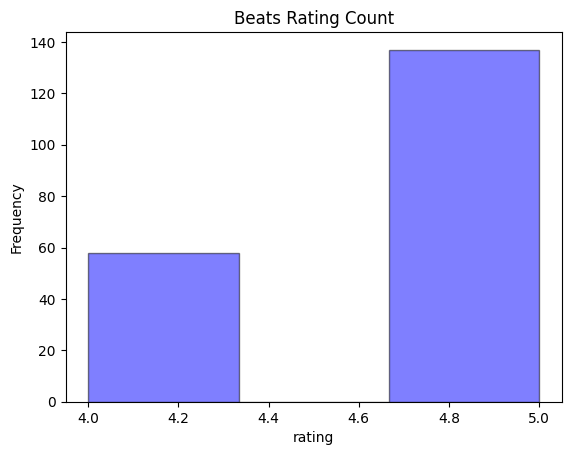

This chart shows the distribution of ratings for Beats headphones. Most ratings are in the high 4s, reflecting strong overall satisfaction. However, there are also some ratings in the low 4s, indicating that while the product is well-regarded, there are a few areas where users feel it could improve. Overall, the data suggests high approval but also highlights room for enhancement.

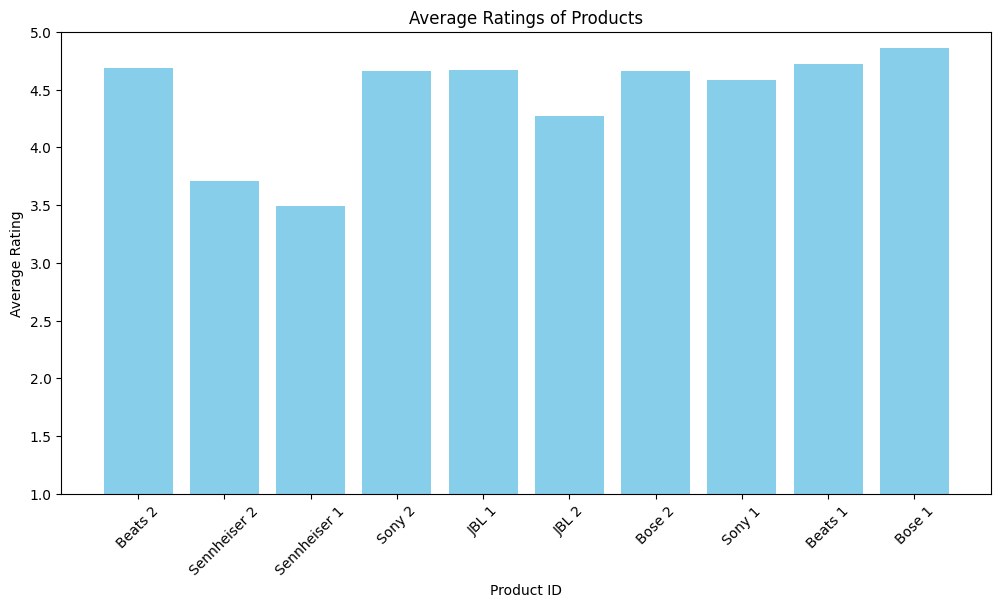


This histogram displays the average ratings for each of the 10 data frames, providing a visual comparison of how different brands, including Beats, Sony, and Bose, are rated. From the histogram, it’s evident that Sony and Bose are closely competing with Beats, with their average ratings being quite similar. However, Bose appears to have a slight edge over Beats, showing marginally better average ratings. To gain a deeper understanding of these differences, I will conduct further sentiment analysis to explore the underlying factors contributing to these variations in ratings.

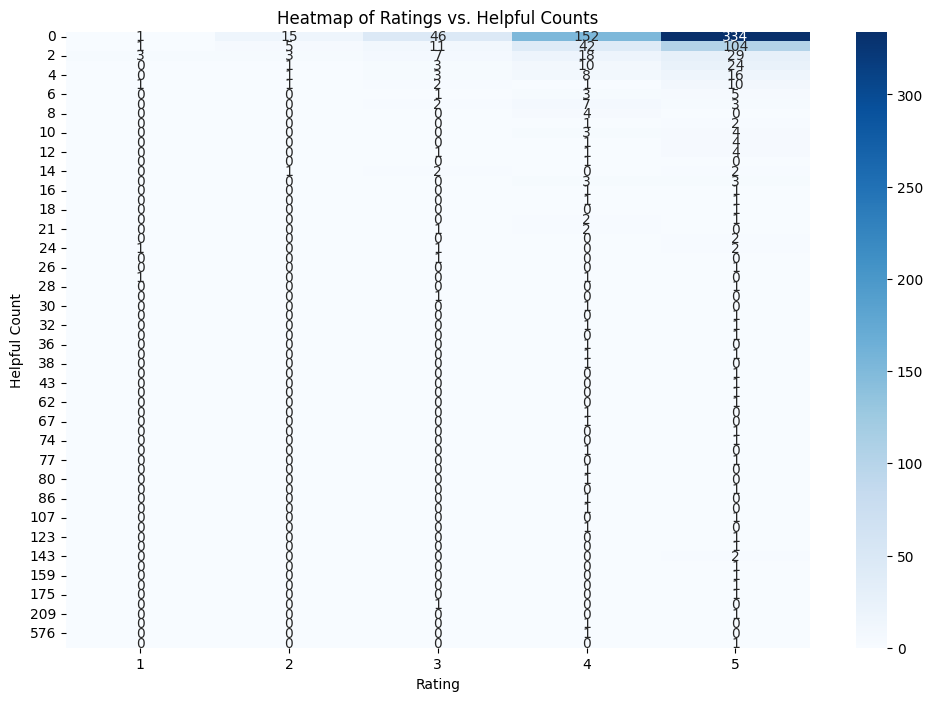

The heatmap reveals that higher ratings tend to be associated with lower helpful counts, while fewer reviews have high helpful counts. This suggests that highly rated products are not always perceived as needing validation or confirmation from other users, possibly because their quality is already widely accepted. Conversely, reviews with higher helpful counts might be for products with more mixed or controversial feedback, where users seek additional opinions before making a decision. This relationship indicates that high ratings don’t necessarily correlate with the perceived usefulness of reviews, reflecting differing consumer behaviors and expectations across products.

### 5.3 Descriptive Statistics

Based on the statistical methods performed earlier, several anomalies were identified. The average rating for Beats was 4.72, with a slightly negative skewness, indicating that most reviews were highly positive but with some variance. The high standard deviation and variance in helpful counts, with many reviews not marked as useful, highlight inconsistencies in perceived review helpfulness.

Further analysis through a correlation test between ratings and helpful counts revealed a correlation coefficient of 0.0074. This indicates there is essentially no correlation between the rating given and the helpfulness of the review. This finding suggests that the perceived helpfulness of a review is largely independent of the rating it receives, meaning high ratings do not necessarily correlate with reviews being considered more helpful. This insight could be valuable for understanding user feedback and improving how reviews are evaluated and utilized.


In [ ]:
#I did this inorder to perform the .skew() function on the data frames
numeric_df1 = df1.select_dtypes(include=['float64', 'int64'])
numeric_df2 = df2.select_dtypes(include=['float64', 'int64'])

print(f'Skewness for beats1: {numeric_df1.skew()}')
print(f'Skewness for beats2: {numeric_df2.skew()}')

correlation_matrix = df[['rating','helpful_count']].corr()
print(correlation_matrix)


## 6. Sentiment Analysis

### 6.1 Methodology
I used Python with TextBlob for sentiment analysis on product reviews. I processed multiple data frames to count positive, negative, and neutral sentiments for each product. I summarized the results in a DataFrame and visualized the sentiment distribution across products using a stacked bar chart with matplotlib.

I also focused on 6 data frames which belong to these 3 comapnies: Beats, Sony, and Bose. I realzied that based on my research so far Sony and Bose seem to have the most competition with Bose so I chose to dive deeper only inlcuding these companies.

In [ ]:
pos_count = 0
neg_count = 0
neu_count = 0

#This will allow me to go through and isolate the sentiment for each of comapnies
dfsForSentiment = [df1, df2, df3, df4, df9, df10]

sentiment_summary = {}

for dfs in dfsForSentiment:
    pos_count = 0
    neg_count = 0
    neu_count = 0

    for review in dfs['content']:
      if isinstance(review, str):
        blob = TextBlob(review)
        sentiment = blob.sentiment

        if sentiment.polarity > 0:
            pos_count += 1
        elif sentiment.polarity < 0:
            neg_count += 1
        else:
            neu_count += 1

    productName = dfs['product_id'].iloc[0] #this is going to give me the id

    sentiment_summary[product_names[productName]] = {
        "positive": pos_count,
        "negative": neg_count,
        "neutral": neu_count
    }

    print(f'Product name: {product_names[productName]}')
    print(f'Positive Count: {pos_count}')
    print(f'Negative Count: {neg_count}')
    print(f'Neutral Count: {neu_count}')
    print('\n')

In [ ]:
#This segment graphs the results
sentiment_df = pd.DataFrame(sentiment_summary).T

plt.figure(figsize=(12, 8))
sentiment_df.plot(kind='bar', stacked=True, color=['green', 'red', 'grey'])
plt.title('Sentiment Distribution by Product')
plt.xlabel('Product')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment', labels=['Positive', 'Negative', 'Neutral'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 6.2 Results


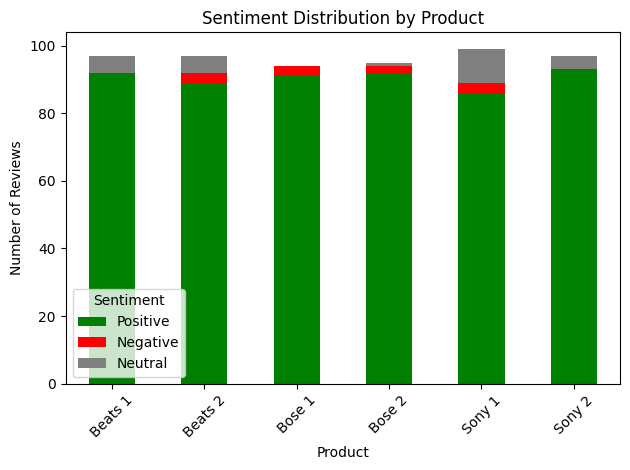


Based on the sentiment analysis, here's a summary of the findings:

* Bose products generally have slightly higher positive sentiment counts compared to Beats. For instance, Bose 1 and Bose 2 both show high positive counts, with only a few negative sentiments.
* Beats products, while slightly lower in positive sentiment than Bose, have a notable advantage in terms of fewer negative reviews. Beats 1 and Beats 2 both have very low negative sentiment counts, indicating a high level of overall satisfaction.
* Sony products show strong positive sentiment, similar to Bose, but with slightly more negative reviews than Beats.

In conclusion, while Bose and Sony have comparable positive sentiment, Beats stands out for its lower number of negative reviews. This suggests that while all products generally receive positive feedback, Beats is more consistent in avoiding negative sentiment. Further analysis could explore why users might be less likely to leave negative feedback for Beats compared to other brands.

## 7. AI-Generated Insights

### 7.1 Using Gemini AI
Briefly explain how Gemini AI was used to extract insights and include any relevant code snippets or explanations.

In [ ]:
mainDF = pd.concat([df3,df4,df9,df10], ignore_index=True)

In [ ]:
api_key = ""
def analyze_reviews(reviews, api_key, prompt):
    genai.configure(api_key="")
    model = genai.GenerativeModel(model_name="gemini-1.5-pro", generation_config={
        "temperature": 1,
        "top_p": 0.95,
        "top_k": 64,
        "max_output_tokens": 8192,
        "response_mime_type": "text/plain"
    })
    chat_session = model.start_chat(history=[
        {
        "role": "user",
        "parts": ["You are a Data Analyst who specializes in consumer insights and has over 20 years of experience"]
    }])
    response = chat_session.send_message(prompt.join(reviews))
    return response.text


In [ ]:
prompt1 = "Analyze the following negative reviews and summarize the key pain points:\n\n" + "\n\n"
prompt2 = "Analyze the following reviews and summarize what this product has that consumers like, that beats seems to not have:\n\n" + "\n\n"
prompt3 = "Find 2 strong examples of comments that mention discomfort of the headphones from the following reviews:\\n\\n" + "\\n\\n"
prompt4 = "Are there any emerging trends or preferences noticeable in the reviews?:\\n\\n"+"\\n\\n"

In [ ]:
if df1['content'].dtype == 'object':
  df1['content'] = df1['content'].astype('str')
if df2['content'].dtype == 'object':
  df2['content'] = df2['content'].astype('str')
print(analyze_reviews(df1['content'], api_key, prompt1))
print(analyze_reviews(df2['content'], api_key, prompt1))

In [ ]:
if df3['content'].dtype == 'object':
  df3['content'] = df['content'].astype('str')
if df4['content'].dtype == 'object':
  df4['content'] = df['content'].astype('str')
print(analyze_reviews(df3['content'], api_key, prompt2))
print('\n')
print(analyze_reviews(df4['content'], api_key, prompt2))

In [ ]:
print(analyze_reviews(df1['content'], api_key, prompt3))
print('\n')
print(analyze_reviews(df2['content'], api_key, prompt3))

In [ ]:
print(analyze_reviews(df1['content'], api_key, prompt4))
if df2['content'].dtype == 'object':
  df2['content'] = df2['content'].astype('str')
print(analyze_reviews(df2['content'], api_key, prompt4))

### 7.2 Key Insights
Summarize the key insights generated by Gemini AI, including specific examples of prompts used and the responses received.

Insights from prompt1:

While the Beats Solo3 headphones are generally praised for their sound quality, battery life, and stylish appearance, there are recurring concerns about the comfort of the on-ear design, especially for extended wear. This suggests that Beats might consider refining the ergonomics in future iterations to cater to a wider range of head sizes and ear shapes.

Most negative comments are outweighed by an overwhelming number of positive ones, except for the discomfort issue. This concern was consistently mentioned and might contribute to a lower sentiment compared to brands like Bose or Sony.

Insights from prompt2:

Based on prompt 2 it seems that the same issue comes up again. Reviews are indicating that from Bose people seem to experience better comfort and durability of the headphones.

Other than changing basic sound related issues such as making a deeper bass or having better nopise cancelation there were some recurring issues regarding discomfort. It seems that there are problems specifically with the headband heinge and earcups. So based on this Beats can try to make the headphoens a bit more durable by trying to use different designs or material to make it less flimsy and make the earcup hinges and ear pads less susceptable to wear and tear.

Increasing the comfort could help eliminate the few negative sentiments as Beats tended to not have many negative setniment to begin with. So making this change could be very influential as it would make it almost 100% positive sentiment.

Insights from prompt3: Some main examples with discomfort include:



*   Air pressure on the eardrums can be a bit too strong at times.
*   The headphones tend to cause a suction feeling when wearing them.
*   The headphones tend to cause a suction feeling when wearing them.
*  After around 4 hours of wearing continusously it seems to hurt their ears a lot.

It seems that the examples all reaffirm the issue of the discomfort of ear cups. Although on average most find them decently comfortable, with the given data it seems that this issue of discomroft seems to be somewhat strong.

Insights from prompt 4:

Positives:
Seamless Pairing: Consumers have reported that the seamless pairing feature works exceptionally well.
Battery Life and Sound Quality: Both battery life and sound quality have received positive feedback from users.

Something to consider: Many customers mentioned purchasing these specific Beats products during sales, which could introduce a bias in their reviews.

Recommendations for Improvement:

Transparent Marketing: Beats could enhance transparency in their marketing strategy. This could include advising customers with larger heads or higher ear sensitivity to try the product before buying.
In-Store Trials: To support this approach, Beats can encourage more stores to have headphones available for customers to try on before purchase.

### 7.3 Interpretation
Summary of insights and their interpretations:

The reviews of Beats Solo3 headphones reveal recurring issues with comfort, particularly with the on-ear design causing ear pressure and pain during extended use. Despite praise for sound quality, battery life, and stylish appearance, these comfort concerns suggest Beats should refine their ergonomic design to cater to a wider range of users. Compared to competitors like Bose and Sony, which are noted for superior comfort and durability, Beats could improve by using more durable materials and enhancing the design of the headband hinge and earcups. Increasing transparency in marketing and encouraging in-store trials could also help manage customer expectations. Addressing these comfort and durability issues could significantly improve user satisfaction and reduce negative reviews.

## 8. Comparative Analysis

### 8.1 Competitor Overview
I originally started off analyzing five companies but ended up focusing on Sony and Bose for comparison with Beats by Dre. As I mentioned earlier these two companies seem to have the ratings on par with Beats which is the reason I chose to focus on them specifically.

Sony and Bose are well-known for their superior comfort, durability, and advanced noise-canceling features, highlighting areas where Beats by Dre could improve. Sony's market positioning emphasizes cutting-edge technology and high-quality audio experiences, while Bose is renowned for its comfort and noise-canceling capabilities. Both brands have strong reputations in the market, offering insights into potential improvements for Beats by Dre, particularly in terms of ergonomics and overall user comfort.

### 8.2 SWOT Analysis
Strengths:

Sound Quality: Highly praised for excellent sound quality.

Brand Image: Strong, stylish brand image and marketing.

Battery Life: Long battery life is a significant advantage.

Seamless Pairing: Efficient and user-friendly pairing process.

Weaknesses:

Comfort: Issues with fit, especially for larger heads, leading to discomfort after extended use.

Durability: Concerns about the build quality, particularly the earcups and headband hinge.

Bass: Bass performance not meeting expectations, especially compared to previous models.

Noise Cancellation: Noise cancellation is good but not superior, with some background noise still audible.

Opportunities:

Product Improvement: Enhancing ergonomics, bass, and noise cancellation can increase customer satisfaction.

Market Expansion: Targeting a wider demographic by addressing fit and comfort issues.

Innovation: Introducing features like multi-device pairing and improved microphone quality.

Transparent Marketing: Advising customers to try before buying and highlighting improvements can build trust.

Threats:

Competitors: Strong competition from brands like Bose and Sony, which excel in comfort, noise cancellation, and durability.

Customer Expectations: High expectations from loyal customers can lead to disappointment if not met.

Market Perception: Negative reviews on comfort and durability can affect the brand's reputation.

## 9. Strategic Recommendations

### 9.1 Product Improvements
1. First we can taclke the issue of comfort: We can incorperate adaptive fit technolgoies. Beats can incoperate new materials or something like a headband inorder to automatically size the headphones to the consumer's liking.

2. Along with this we can also tackle the earcup problems by having pressure relief earcups. Consumers tend have a problem with teh ear cups as covered in the previous insights. If some beats products already have this we can try to improve them aswell to stand out even more.

3. Inorder to standout from the competition we can incorperate AI to create personalized sound profiles. The AI would be trained on teh user's perfferences and listening habits. This idea would also solve the issue of having too little bass or overall general sound related issues.

Other than these major fixes Beats should continue to make active adjustments to their sound quality, dual pairing and other features.



### 9.2 Marketing Strategies
Transparent Marketing and In-Store Trials:

Honest Marketing Campaigns: Betas can launch campaigns highlighting the improvements made in response to customer feedback, such as enhanced comfort and durability. This can build trust and attract customers who value transparency.

In-Store Trials: Partner with retailers to offer in-store trials, allowing customers to experience the product's fit and sound quality before purchasing. This can help mitigate concerns about comfort and ensure customers choose the right product for their needs before making the decision to buy.

Continue to have deals: As noted earlier, consumers tend to buy the headphones more when they are on sale. The sales could also help people see the changes made and act as a source of marketing, allowing consumers to try high-quality headphones at a lower price, which would make them more likely to recommend to others and buy again.

### 9.3 Future Research
Future research can consist of finding out better ways to incorporate technologies such as AR (Augmented Reality) and AI (Artificial Intelligence). These technologies are on the rise and could help Beats stand out. Beats could incorporate these technologies in order to have a larger market presence and stand out as more than just good headphones. By adding smart features like voice assistant integration and so on, it could help scale the company to be an even bigger powerhouse in the audio industry.

## 10. Conclusion
The project reveals that while the Beats Studio Pros are praised for their sound quality, battery life, and style, there are notable areas for improvement. Key concerns include weaker bass compared to previous models, less effective noise cancellation, and comfort issues, particularly for users with larger heads or sensitive ears. Competitors like Sony and Bose outperform Beats in these aspects, with superior noise cancellation, bass depth, and overall comfort. Recommendations for Beats include enhancing noise cancellation, improving bass quality, redesigning for better comfort and durability. Marketing strategies should continue leveraging sales promotions to attract and retain customers while exploring innovations like Augmented Reality (AR) and Artificial Intelligence (AI) to differentiate Beats in the market. Overall, this data analytics project provides key and valuable insights into consumer sentiment, offering potential guidance for product development and strategic marketing to improve Beat's weaknesses.

## 11. References
For my project, I used a variety of resources and tools to gather and analyze data on consumer sentiment for Beats by Dre. I primarily relied on online platforms such as Amazon and YouTube for product reviews and consumer feedback. To conduct data analysis, I employed Python libraries including TextBlob for sentiment analysis and matplotlib for visualization. Additionally, I used tools for exploratory data analysis (EDA) and web scraping, such as Pandas and Oxylabs. I also explored external sources and frameworks to enhance my understanding and approach, incorporating insights from industry practices to inform my analysis. Finally, a big help were the recourses provided by Extern that really helped me bring this project together.
